# Data Analytics using Python

## Web scraping with BeautifulSoup: Coronavirus Data

This Notebook performs web scraping with BeautifulSoup, converting the extracted data into a CSV file, and construct a Pandas DataFrame. 

In this scenario, you work as a data analyst at a health insurance company. To provide up-to-date information for the executive, claims department, and clients, you are tasked with gathering the latest data on worldwide COVID-19 cases. 

Each department requires different information. For each continent on the list:
The executive needs to know:
- Total cases
- Total deaths

Claims needs to know:
- New cases
- New deaths
- Active cases
- Serious, Critical

Clients need to know:
- Total cases
- Total recovered
- Newly recovered

# 1. Establish Connection

In [1]:
# import libraries
import pandas as pd
import requests 
from bs4 import BeautifulSoup

# Create a variable to save the URL.
url = 'https://www.worldometers.info/coronavirus/'

# Specify the URL and request with get().
r = requests.get(url)

# detetmine connection 
if r.status_code == 200:
    html_doc = r.text
    
# view data
print(r)

<Response [200]>


# 2. Extract data from the website

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
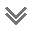

In [2]:
# create Beautiful Soup Object
soup = BeautifulSoup(html_doc)

# Print Output
print(soup.prettify())

# 3. Extract data from the table

In [3]:
# Find the table elements 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# Show all the tables
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

# 4. Extract Table Headers

In [4]:
# Specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style': ""})

# View the result.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>700,616,627</td>
 <td

attrs={'style': ""}: This is a dictionary specifying the attributes we want to match. In this case, we are looking for <tr> elements that have a style attribute with an empty value (i.e., no inline styling applied). It means we want to find plain <tr> elements with no specific style rules defined.

# 5. Extract all the rows

In [19]:
# Store the extracted data.
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']     
        
# Create a for loop statement. Skip the first column as its just the row number. 
for cases in rows:
    cases_data = cases.find_all("td")[1:]  # Start from the second column (index 1) to skip the row numbers.
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# Create an output.
output

[{'Country,Other': 'World',
  'Total Cases': '700,616,627',
  'New Cases': '+7,101',
  'Total Deaths': '6,961,860',
  'New Deaths': '+49',
  'Total Recovered': '671,780,174',
  'New Recovered': '+16,801',
  'Active Cases': '21,874,593',
  'Serious, Critical': '35,954',
  'Tot Cases/ 1M pop': '89,883',
  'Deaths/ 1M pop': '893.1',
  'Total Tests': '',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': 'USA',
  'Total Cases': '110,082,490',
  'New Cases': '',
  'Total Deaths': '1,190,137                                ',
  'New Deaths': '',
  'Total Recovered': '107,858,128',
  'New Recovered': '',
  'Active Cases': '1,034,225',
  'Serious, Critical': '1,785',
  'Tot Cases/ 1M pop': '328,796',
  'Deaths/ 1M pop': '3,555',
  'Total Tests': '1,186,546,440',
  'Tests/ 1M pop': '3,543,990',
  'Population': '334,805,269 '},
 {'Country,Other': 'India',
  'Total Cases': '45,009,660',
  'New Cases': '',
  'Total Deaths': '533,337                                ',
  'New Deaths': '',


# 6. Create a Pandas DataFrame

In [20]:
# import pandas 
import pandas as pd

# create a DataFrame
data = pd.DataFrame(output)
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,World,"700,616,627","+7,101","6,961,860",+49,"671,780,174","+16,801","21,874,593","35,954","89,883",893.1,,,
1,USA,"110,082,490",,"1,190,137",,"107,858,128",,"1,034,225","1,785","328,796","3,555","1,186,546,440","3,543,990","334,805,269"
2,India,"45,009,660",,"533,337",,N/A,N/A,N/A,N/A,"31,998",379,"930,797,975","661,721","1,406,631,776"
3,Germany,"38,758,005",,"179,937",,"38,240,600",,"337,468",N/A,"462,045","2,145","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,177,375",,"708,491",,"36,249,161",,"1,219,723",N/A,"177,278","3,290","63,776,166","296,146","215,353,593"


# Convert Clean and Analyse Data

In [21]:
# Save the DataFrame as a CSV file without index.
data.to_csv('cases.csv', index=False)

In [22]:
# Create a JSON file.
import json

# Create a JSON file.
output_json = json.dumps(output)

# View the output.
output_json

'[{"Country,Other": "World", "Total Cases": "700,616,627", "New Cases": "+7,101", "Total Deaths": "6,961,860", "New Deaths": "+49", "Total Recovered": "671,780,174", "New Recovered": "+16,801", "Active Cases": "21,874,593", "Serious, Critical": "35,954", "Tot Cases/ 1M pop": "89,883", "Deaths/ 1M pop": "893.1", "Total Tests": "", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "USA", "Total Cases": "110,082,490", "New Cases": "", "Total Deaths": "1,190,137                                ", "New Deaths": "", "Total Recovered": "107,858,128", "New Recovered": "", "Active Cases": "1,034,225", "Serious, Critical": "1,785", "Tot Cases/ 1M pop": "328,796", "Deaths/ 1M pop": "3,555", "Total Tests": "1,186,546,440", "Tests/ 1M pop": "3,543,990", "Population": "334,805,269 "}, {"Country,Other": "India", "Total Cases": "45,009,660", "New Cases": "", "Total Deaths": "533,337                                ", "New Deaths": "", "Total Recovered": "N/A", "New Recovered": "N/A", "Active Cas

In [23]:
# Save the JSON file to .json.
with open('cases_json.json', 'w') as f:
    json.dump(output, f)

In [24]:
# Read the JSON using Pandas, output to .csv.
pd.read_json(output_json).to_csv('cases_csv.csv', index=False)

In [25]:
# Import and read the CSV file.
data_csv = pd.read_csv('cases_csv.csv')

# View the data.
print(data_csv.head())

# Import and read the JSON file.
data_json = pd.read_json('cases_json.json')

# View the DataFrame. 
data_json.head()

  Country,Other  Total Cases New Cases  \
0         World  700,616,627    +7,101   
1           USA  110,082,490       NaN   
2         India   45,009,660       NaN   
3       Germany   38,758,005       NaN   
4        Brazil   38,177,375       NaN   

                                Total Deaths  New Deaths Total Recovered  \
0                                  6,961,860        49.0     671,780,174   
1  1,190,137                                         NaN     107,858,128   
2    533,337                                         NaN             NaN   
3    179,937                                         NaN      38,240,600   
4    708,491                                         NaN      36,249,161   

  New Recovered Active Cases Serious, Critical Tot Cases/ 1M pop  \
0       +16,801   21,874,593            35,954            89,883   
1           NaN    1,034,225             1,785           328,796   
2           NaN          NaN               NaN            31,998   
3           NaN   

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,World,"700,616,627","+7,101","6,961,860",+49,"671,780,174","+16,801","21,874,593","35,954","89,883",893.1,,,
1,USA,"110,082,490",,"1,190,137",,"107,858,128",,"1,034,225","1,785","328,796","3,555","1,186,546,440","3,543,990","334,805,269"
2,India,"45,009,660",,"533,337",,N/A,N/A,N/A,N/A,"31,998",379,"930,797,975","661,721","1,406,631,776"
3,Germany,"38,758,005",,"179,937",,"38,240,600",,"337,468",N/A,"462,045","2,145","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,177,375",,"708,491",,"36,249,161",,"1,219,723",N/A,"177,278","3,290","63,776,166","296,146","215,353,593"


In [26]:
# View the CSV and JSON DataFrames.
print(data_csv.dtypes)
print(data_csv.columns)

print(data_json.dtypes)
print(data_json.columns)

Country,Other         object
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths           float64
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')
Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop  

### Create a subset consisting of the columns Country,Other, Total Cases, Total Deaths, Total Recovered, Active Cases, Serious, and Critical.

In [27]:
# Create a subset.
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

# View the column names.
print(data_report.columns)
data_report

Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')


,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
0,World,"700,616,627","6,961,860","671,780,174","21,874,593","35,954"
1,USA,"110,082,490","1,190,137","107,858,128","1,034,225","1,785"
2,India,"45,009,660","533,337",NaN,NaN,NaN
3,Germany,"38,758,005","179,937","38,240,600","337,468",NaN
4,Brazil,"38,177,375","708,491","36,249,161","1,219,723",NaN
...,...,...,...,...,...,...
201,Montserrat,"1,403",8,"1,376",19,NaN
202,Niue,937,,919,18,NaN
203,Tokelau,80,,NaN,80,NaN
204,China,"503,302","5,272","379,053","118,977",NaN


In [28]:
# Determine missing values.
data_report.isnull().sum()

Country,Other          0
Total Cases            0
Total Deaths           0
Total Recovered       48
Active Cases          47
Serious, Critical    154
dtype: int64

In [29]:
# Save the DataFrame as a CSV file without index.
data_report.to_csv('cases_report.csv', index=False)

In [30]:
# View the saved CSV.
cases_report = pd.read_csv('cases_report.csv')

# View the DataFrame.
cases_report.head()

,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
0,World,"700,616,627","6,961,860","671,780,174","21,874,593","35,954"
1,USA,"110,082,490","1,190,137","107,858,128","1,034,225","1,785"
2,India,"45,009,660","533,337",NaN,NaN,NaN
3,Germany,"38,758,005","179,937","38,240,600","337,468",NaN
4,Brazil,"38,177,375","708,491","36,249,161","1,219,723",NaN
